We wrote a scrapper to fetch all coins from coinmarketcap and extract them into separate csv files

Now we are going to use them!

In [11]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bitcoin = pd.read_csv('../data/november/bitcoin.csv')
ethereum = pd.read_csv('../data/november/ethereum.csv')
litecoin = pd.read_csv('../data/november/litecoin.csv')

Converting string do datetime and creating a "weekday" column

In [12]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
bitcoin['Weekday'] = ((pd.DatetimeIndex(bitcoin['Date']).dayofweek) // 5 == 0).astype(bool)

ethereum['Date'] = pd.to_datetime(ethereum['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
ethereum['Weekday'] = ((pd.DatetimeIndex(ethereum['Date']).dayofweek) // 5 == 0).astype(bool)

litecoin['Date'] = pd.to_datetime(litecoin['Date'], format='%Y-%m-%d %H:%M:%S +0000 UTC', utc=True)
litecoin['Weekday'] = ((pd.DatetimeIndex(litecoin['Date']).dayofweek) // 5 == 0).astype(bool)



Printing the head

In [13]:
ethereum.head()

,Date,Open,High,Low,Close,Volume,MarketCap,Weekday
0,2018-11-05 00:00:00+00:00,207.1,210.8,206.6,209.1,1613510000,21540893856,True
1,2018-11-04 00:00:00+00:00,200.2,211.3,199.0,207.5,1749300000,21371828848,False
2,2018-11-03 00:00:00+00:00,200.7,200.7,199.5,200.2,1307150000,20615851076,False
3,2018-11-02 00:00:00+00:00,199.0,201.3,198.8,200.6,1451870000,20482679355,True
4,2018-11-01 00:00:00+00:00,197.5,203.8,197.3,198.9,1336700000,20471899882,True


We can divide the datasets between weekday and weekends and compare median volumes

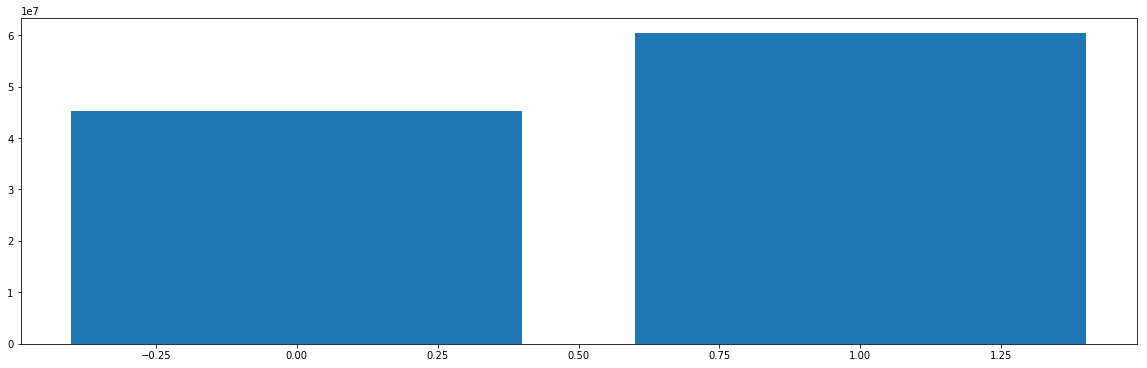

In [14]:
bitcoin_weekend = bitcoin[bitcoin['Weekday'] == False]
bitcoin_weekday = bitcoin[bitcoin['Weekday'] == True]

median_weekend = np.median(bitcoin_weekend['Volume'])
median_weekday = np.median(bitcoin_weekday['Volume'])

x = np.arange(2)
plt.bar(x, [median_weekend, median_weekday])
plt.show()

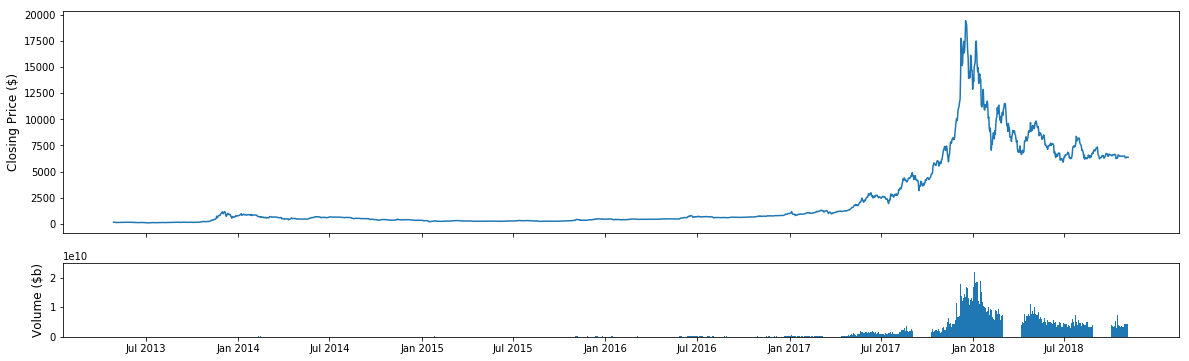

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])

ax1.plot(bitcoin['Date'].astype(datetime.datetime),bitcoin['Open'])
ax2.bar(bitcoin['Date'].astype(datetime.datetime).values, bitcoin['Volume'].values)

plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

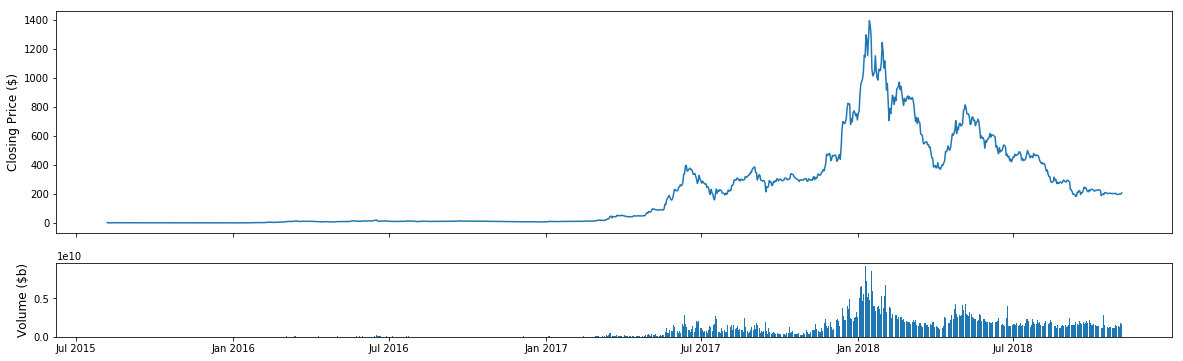

In [16]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])

ax1.plot(ethereum['Date'].astype(datetime.datetime),ethereum['Open'])
ax2.bar(ethereum['Date'].astype(datetime.datetime).values, ethereum['Volume'].values)

plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

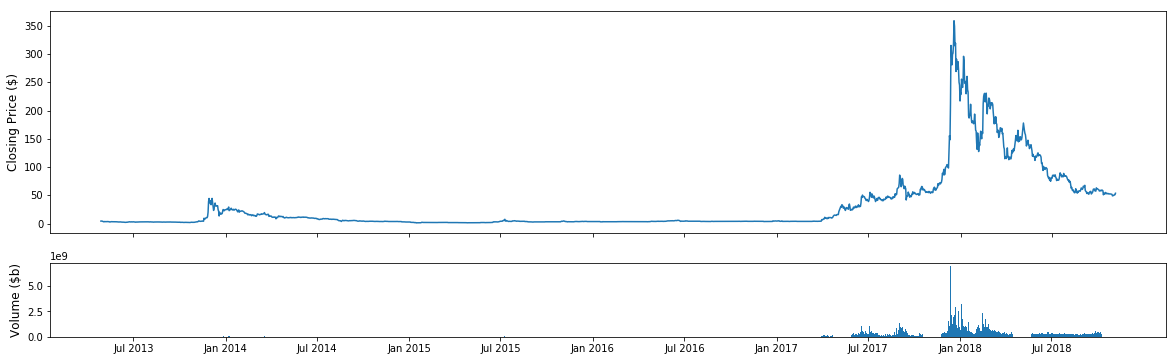

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')

ax2.set_ylabel('Volume ($b)', fontsize=12)
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,7]])

ax1.plot(litecoin['Date'].astype(datetime.datetime),litecoin['Open'])
ax2.bar(litecoin['Date'].astype(datetime.datetime).values, litecoin['Volume'].values)

plt.rcParams['figure.figsize'] = (20, 6)
plt.show()

In [18]:
kwargs = {
    'Gap': lambda x: 2*(x['High']-x['Close'])/(x['High']-x['Low'])-1, 
    'Volatility': lambda x: (x['High']-x['Low'])/(x['Open'])
}

bitcoin = bitcoin[bitcoin['Date']>='2014-01-01']
bitcoin = bitcoin.assign(**kwargs)
bitcoin = bitcoin.sort_values(by='Date', ascending=True)

model_data = bitcoin[['Date']+['Close']+['Volume']+['Gap']+['Volatility']]
model_data.head()

,Date,Close,Volume,Gap,Volatility
1769,2014-01-01 00:00:00+00:00,771.4,22489400,-0.607843,0.027020
1768,2014-01-02 00:00:00+00:00,802.4,38489500,-0.325800,0.068658
1767,2014-01-03 00:00:00+00:00,818.7,37810100,-0.315556,0.056047
1766,2014-01-04 00:00:00+00:00,859.5,38005000,-1.000000,0.070205
1765,2014-01-05 00:00:00+00:00,933.5,72898496,-0.613892,0.114036


Split training and test sets and drop Date column

In [19]:
split_date = '2017-01-01'

training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [20]:
window_size = 30
normalize = ['Close', 'Volume']

LSTM_training_inputs = []

for i in range(len(training_set)-window_size):
    temp_set = training_set[i:(i+window_size)].copy()
    for col in normalize:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    
    temp_set.loc[np.isnan(temp_set['Volume']), 'Volume'] = 0
    LSTM_training_inputs.append(temp_set)

LSTM_training_outputs = (training_set['Close'][window_size:].values/training_set['Close'][:-window_size].values)-1

In [21]:
LSTM_test_inputs = []

for i in range(len(test_set)-window_size):
    temp_set = test_set[i:(i+window_size)].copy()
    for col in normalize:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)

LSTM_test_outputs = (test_set['Close'][window_size:].values/test_set['Close'][:-window_size].values)-1

In [22]:
# I find it easier to work with numpy arrays rather than pandas dataframes
# especially as we now only have numerical data

LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_input) for LSTM_test_input in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [23]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [24]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
btc_model = build_model(LSTM_training_inputs, output_size=1, neurons=20)
# model output is next price normalised to 30th previous closing price
LSTM_training_outputs = (training_set['Close'][window_size:].values/training_set['Close'][:-window_size].values)-1
# train model on datab
# note: btc_history contains information on the training error per epoch
btc_history = btc_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Epoch 1/50
 - 12s - loss: 0.0687
Epoch 2/50
 - 11s - loss: 0.0428
Epoch 3/50
 - 12s - loss: 0.0381
Epoch 4/50
 - 13s - loss: 0.0358
Epoch 5/50
 - 14s - loss: 0.0339
Epoch 6/50
 - 11s - loss: 0.0318
Epoch 7/50
 - 11s - loss: 0.0318
Epoch 8/50
 - 12s - loss: 0.0318
Epoch 9/50
 - 12s - loss: 0.0316
Epoch 10/50
 - 12s - loss: 0.0319
Epoch 11/50
 - 12s - loss: 0.0295
Epoch 12/50
 - 12s - loss: 0.0299
Epoch 13/50
 - 12s - loss: 0.0314
Epoch 14/50
 - 12s - loss: 0.0298
Epoch 15/50
 - 13s - loss: 0.0298
Epoch 16/50
 - 12s - loss: 0.0290
Epoch 17/50
 - 11s - loss: 0.0295
Epoch 18/50
 - 11s - loss: 0.0289
Epoch 19/50
 - 11s - loss: 0.0305
Epoch 20/50
 - 13s - loss: 0.0287
Epoch 21/50
 - 12s - loss: 0.0289
Epoch 22/50
 - 12s - loss: 0.0294
Epoch 23/50
 - 12s - loss: 0.0284
Epoch 24/50
 - 12s - loss: 0.0279
Epoch 25/50
 - 12s - loss: 0.0278
Epoch 26/50
 - 11s - loss: 0.0291
Epoch 27/50
 - 12s - loss: 0.0285
Epoch 28/50
 - 11s - loss: 0.0295
Epoch 29/50
 - 12s - loss: 0.0289
Epoch 30/50
 - 13s - lo

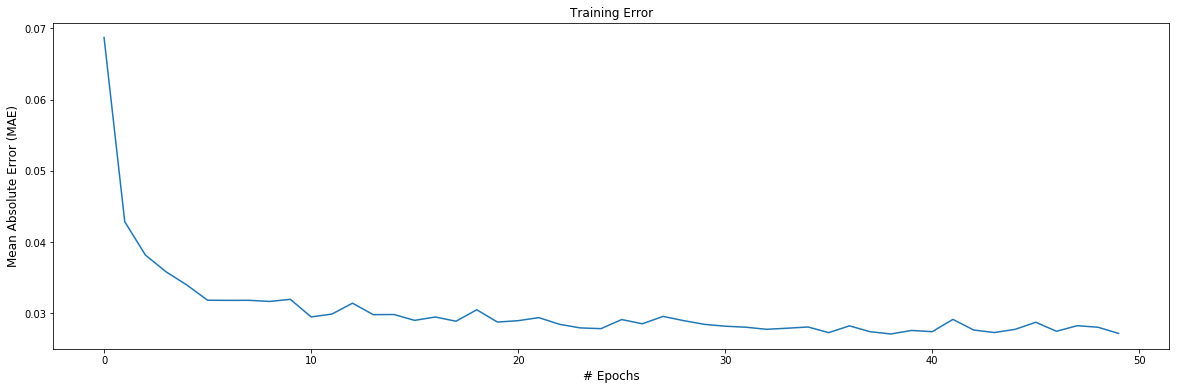

In [25]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(btc_history.epoch, btc_history.history['loss'])
ax1.set_title('Training Error')

if btc_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

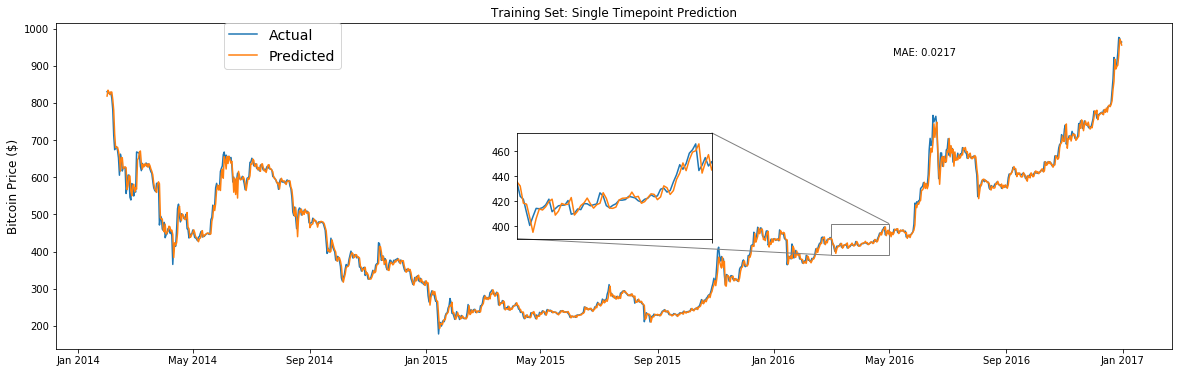

In [26]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         training_set['Close'][window_size:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_training_inputs))+1) * training_set['Close'].values[:-window_size])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(btc_model.predict(LSTM_training_inputs))+1)-\
            (training_set['Close'].values[window_size:])/(training_set['Close'].values[:-window_size]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         training_set['Close'][window_size:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_size:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_training_inputs))+1) * training_set['Close'].values[:-window_size])[0], 
         label='Predicted')
axins.set_xlim([datetime.date(2016, 3, 1), datetime.date(2016, 5, 1)])
axins.set_ylim([390,475])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

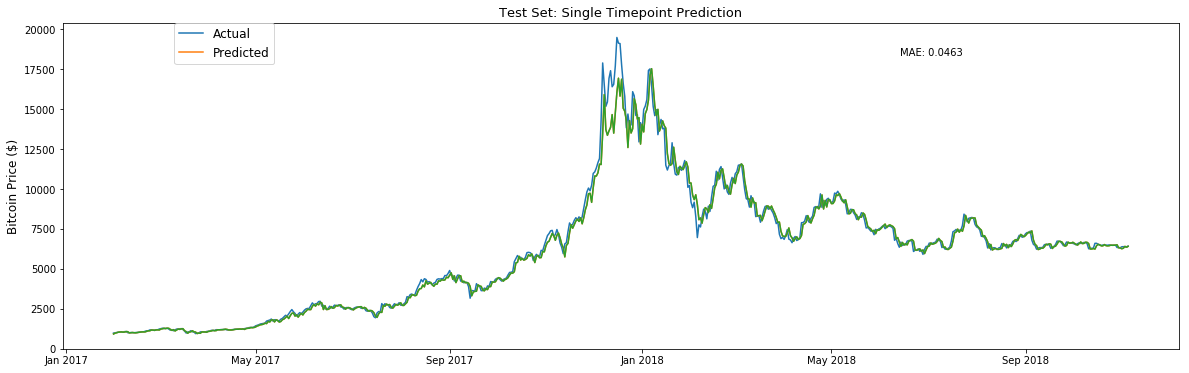

In [28]:
fig, ax1 = plt.subplots(1,1)

ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         test_set['Close'][window_size:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_test_inputs))+1) * test_set['Close'].values[:-window_size])[0], 
         label='Predicted')

ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(btc_model.predict(LSTM_test_inputs))+1)-\
            (test_set['Close'].values[window_size:])/(test_set['Close'].values[:-window_size]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 12})

ax1.plot(model_data[model_data['Date']>= split_date]['Date'][30:].astype(datetime.datetime),
         ((np.transpose(btc_model.predict(LSTM_test_inputs))+1) * test_set['Close'].values[:-window_size])[0], 
         label='Predicted')
plt.show()

In [29]:
predicting_set = test_set

for i in range(window_size):
    name = len(test_set) + i
    columns = ['Close', 'Volume', 'Gap', 'Volatility']
#     price = 7000 + np.random.uniform(-1000, 1000)
#     volume = 4000000000 + np.random.uniform(-1000000000, 1000000000)
    price = 0
    volume = 0
    empty_series = pd.Series([price, volume, 0.5, 0.05], index=columns, name=name)
    predicting_set = predicting_set.append(empty_series)
    
predicting_set = predicting_set.sort_index(ascending=False)
predicting_set

LSTM_predict_inputs = []

for i in range(len(predicting_set)-window_size):
    temp_set = predicting_set[i:(i+window_size)].copy()
    for col in normalize:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
        temp_set.loc[np.isnan(temp_set['Close']), 'Close'] = 0
        temp_set.loc[np.isnan(temp_set['Volume']), 'Volume'] = 0
        temp_set.loc[np.isinf(temp_set['Close']), 'Close'] = 0
        temp_set.loc[np.isinf(temp_set['Volume']), 'Volume'] = 0
        LSTM_predict_inputs.append(temp_set)

LSTM_predict_inputs = [np.array(LSTM_predict_input) for LSTM_predict_input in LSTM_predict_inputs]
LSTM_predict_inputs = np.array(LSTM_predict_inputs)

np.shape(LSTM_predict_inputs)

predicted = btc_model.predict(LSTM_predict_inputs)

In [30]:
predicted = (np.transpose(predicted[-30:]+1))*7000
predicted

array([[6715.9805, 6715.9805, 6713.6533, 6713.6533, 6841.6094, 6841.6094,
        7034.5103, 7034.5103, 6974.5537, 6974.5537, 6786.0415, 6786.0415,
        6822.5454, 6822.5454, 6897.7085, 6897.7085, 6673.561 , 6673.561 ,
        6700.3843, 6700.3843, 6678.4736, 6678.4736, 6770.427 , 6770.427 ,
        6817.6123, 6817.6123, 6711.0894, 6711.0894, 6806.298 , 6806.298 ]],
      dtype=float32)

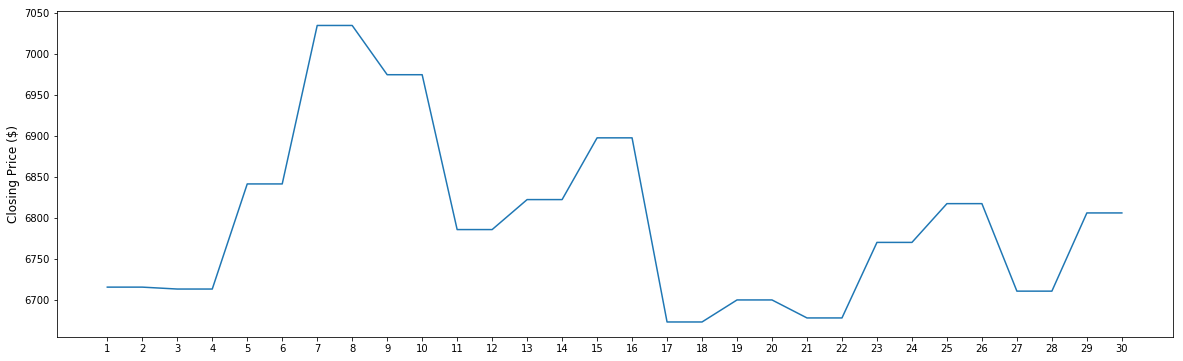

In [31]:
fig, ax1 = plt.subplots(1,1)

ax1.set_ylabel('Closing Price ($)', fontsize=12)
ax1.set_xticks([i for i in range(30)])
ax1.set_xticklabels([i+1 for i in range(30)])

plt.plot(np.transpose(predicted))
plt.show()